In [178]:
import pandas as pd

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# visualization
import matplotlib.pyplot as plt

In [179]:
# load titanic data
t_data = pd.read_csv('../../Data/titanic.csv')

| Variable  | Definition                                       | Key                                        |
|-----------|-------------------------------------------------|--------------------------------------------|
| survival  | Survival                                         | 0 = No, 1 = Yes                            |
| pclass    | Ticket class                                     | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex       | Sex                                              |                                            |
| Age       | Age in years                                     |                                            |
| sibsp     | # of siblings / spouses aboard the Titanic       |                                            |
| parch     | # of parents / children aboard the Titanic       |                                            |
| ticket    | Ticket number                                    |                                            |
| fare      | Passenger fare                                   |                                            |
| cabin     | Cabin number                                     |                                            |
| embarked  | Port of Embarkation                              | C = Cherbourg, Q = Queenstown, S = Southampton |


### Function Transformer
Makes functions compatible with scikit-learn pipelines.

We are going to add two new features:
- Title (Mr, Dr, etc)
- Family size (number of siblings, spouses, parents and children)

In [180]:
# add title feature
# t_data['Title'] = t_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# titles = t_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
# t_data['Title'] = titles

In [181]:
def get_title(data):
    df = data.copy() # avoid changing the original data
    df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
    most_common_titles = df['Title'].value_counts().head(6).index.tolist() # get the 6 most common titles
    df.loc[~df['Title'].isin(most_common_titles), 'Title'] = 'Other' # replace less common titles with 'Other', faster than apply + lambda
    return df

<Axes: >

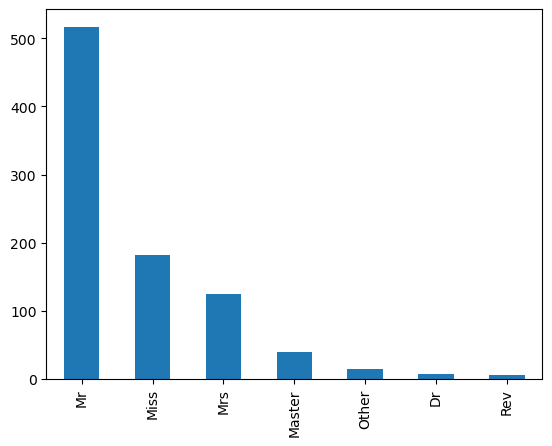

In [182]:
# check if the function works
get_title(t_data).Title.value_counts().plot(kind='bar')

In [183]:
get_title_transformer = FunctionTransformer(get_title)

In [184]:
get_title_transformer.fit_transform(t_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [185]:
# get family size function
def get_family_size(data):
    df = data.copy()
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    return df

In [186]:
# check if the function works
get_family_size(t_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [187]:
get_family_size_transformer = FunctionTransformer(get_family_size)

In [188]:
get_family_size_transformer.fit_transform(t_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


### Pipeline and ColumnTransformer
Pipeline applies sequentially a list of transformations.

ColumnTransformer applies in parallel a list of transformations to selected columns.

In [189]:
# numerical features pipeline
numerical_features = ['Age', 'Fare', 'FamilySize', 'Pclass']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [190]:
# categorical features pipeline
categorical_features = ['Sex', 'Embarked', 'Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [191]:
# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # drop name, SibSp, and Parch columns
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Fare', 'FamilySize', 'Pclass']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Title'])])

In [192]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_clf = KNN()

In [193]:
# classification pipeline
pipe_clf = Pipeline(
    steps=[
        ('get_title', get_title_transformer),
        ('get_family_size', get_family_size_transformer),
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures()),
        ('clf', knn_clf)
    ]
)
pipe_clf

Pipeline(steps=[('get_title',
                 FunctionTransformer(func=<function get_title at 0x7f44007b4e50>)),
                ('get_family_size',
                 FunctionTransformer(func=<function get_family_size at 0x7f436f711900>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare', 'FamilySize',
                                                   'Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('poly_features', PolynomialFeatures()),
                ('clf', KNeighborsClassifier())])

### GridSearch

In [194]:
# feature matrix and target vector
X = t_data.drop(['Survived', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
y = t_data['Survived']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [195]:
# param grid
param_grid = {
    'clf__n_neighbors': list(range(1, 25)),
    'clf__weights': ['uniform', 'distance'],
    'poly_features__degree': [1, 2]
}

# grid search
grid_search = GridSearchCV(
                           pipe_clf,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           error_score='raise',
                           verbose=1,
                           n_jobs=-1
                        )
# model is pipe_clf, param_grid is param_grid, cv is 5-fold cross validation, verbose is 1, n_jobs is -1 to use all processors
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('get_title',
                                        FunctionTransformer(func=<function get_title at 0x7f44007b4e50>)),
                                       ('get_family_size',
                                        FunctionTransformer(func=<function get_family_size at 0x7f436f711900>)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scal...
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title'])])),
                                       ('poly_features', PolynomialFeatures()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24],
                         'clf__weights': ['uniform', 'distance'],
                         'poly_features__degree': [1, 2]},
             scoring='accuracy', verbose=1)

In [196]:
# best params
grid_search.best_params_

{'clf__n_neighbors': 5, 'clf__weights': 'uniform', 'poly_features__degree': 1}

In [197]:
# best classifier
best_clf = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       129
           1       0.83      0.73      0.78        94

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.82       223



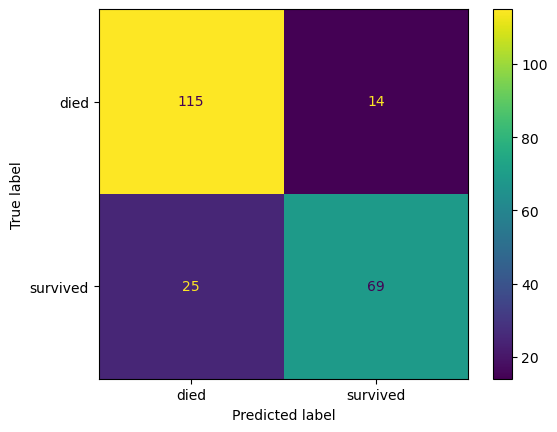

In [199]:
# predict
y_pred = best_clf.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))

# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['died', 'survived'])
disp.plot()

In [201]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
# the titanic movie in a few lines of code
passengers = pd.DataFrame(
    {
        'Name': ['Dawson, Mr. Jack', 'DeWitt Bukater, Miss. Rose'],
        'Age': [20, 17],
        'Sex': ['male', 'female'],
        'Fare': [0, 500],
        'Embarked': ['S', 'S'],
        'Pclass': [3, 1],
        'SibSp': [0, 1],
        'Parch': [0, 1],
    }
)

In [208]:
best_clf.predict(passengers)
# 1=Survived, 0=Died

array([0, 1])